<a href="https://colab.research.google.com/github/HilkarSoberanes/Physics/blob/main/HeatEquation_CircularPlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical solution of the heat equation for a circular plate with a hole and rotational symmetry.

The solution of the heat equation for a circular plate of radius $b$ with a hole of radius $a$ in the center, where $b = 4a$ and the boundary conditions are $\Psi(a) = \Psi( b) = 0$ and initial conditions given by $f(\rho, \theta) = R(\rho) $ a function that only depends on $\rho$, i.e. has rotational symmetry is given by

$$
    \Psi(\rho, \theta, t) = \sum _{n = 1} ^\infty A_{0,n} \left[J_0 \left(\frac{\lambda_{0,n}}{a}  \rho\right) + \delta_{0,n} Y_0 \left( \frac{\lambda_{0,n}}{a} \rho \right) \right] e^{- \frac{\lambda_{0,n} ^2}{a^2 D}t},
$$


where the radial component is given by the sum of
$$
R_{0,n}=J_0 \left(\frac{\lambda_{0,n}}{a}  \rho\right) + \delta_{0,n} Y_0 \left( \frac{\lambda_{0,n}}{a} \rho \right), 
$$ 

with

$$
    \delta_{0,n} = - \frac{J_0(\lambda_{0,n}) }{Y_0 (\lambda_{0,n})},
$$


$$
    A_{0,n} = \frac{1}{2 \pi N^2_{0,n}} \int _{-\pi} ^\pi \int_a ^b f(\rho,  \theta) R_{0,n} (\rho) \rho d \theta d \rho
$$



and


$$
N^2_{0,n} = \int_{a}^b R^2_{0,n} (\rho) \rho d \rho.
$$

If


$$
f(\rho) = \begin{cases} 0 \:\:\: a <\rho< 2a \\ 1\:\:\: 2a < \rho < 3 a \\ 0 \:\:\: 3a < \rho < b \end{cases},
$$

then

$$
    A_{0,n} = \frac{1}{N^2_{0,n}} \int_{2a} ^{3a} R_{0,n}(\rho) \rho d \rho.
$$



If we consider $a = 1$, the boundary conditions are reduced to solving the following transcendental equation

$$
    J_0(4 \lambda_{0,n}) Y_0(\lambda_{0,n}) - J_0(\lambda_{0,n}) Y_0(4 \lambda_{0,n}) = 0.
$$



We found the first 149 solutions of Equation 50 using Ridders' method from which we were able to calculate $\delta_{0,n}$ and $R_{0,n}$ and then numerically integrating with Simpson's method to obtain the $A_{0,n}$

### Setup

In [5]:
from pylab import *
from scipy.special import *
from scipy.optimize import *
import pandas as pd
import numpy as np

from matplotlib import animation,rc
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%config InlineBackend.figure_format ="retina"

### Define Ridders' Method and the function in the Trascendental equation

In [6]:
from math import sqrt
epsilon = 1.0e-15


# Function
def f(x):
    b = 4*x
    F = (jv(0,x)*yv(0,b) - jv(0,b)*yv(0,x))
    return F

#Ridders

def ridders(f,x1,x2,epsilon):
    while (x2 - x1)>epsilon:
        f1 = f(x1)
        if f1 == 0:
            return x1
        f2= f(x2)
        if f2 == 0:
            return x2
        if f1*f2>0:
            return 'No hay raiz en el intervalo dado'
        for i  in range(30):
            x3 = (x1 + x2)/2
            f3 = f(x3)
            s = sqrt(f3**2- f1*f2)
        if s == 0:
            return None
        
        dx = (x3-x1)*f3/s
        if (f1 - f2)<0:
            dx = -dx
        x = x3 + dx 
        fx = f(x)
        
        if f3*fx>0:
            if f1*fx<0:
                x2 = x
                f2 = fx
            else:
                x1 = x
                f1 = fx
        else:
            x1 = x3
            x2 = x
            f1 = f3
            f2 = fx
    return x


### Plot the function f(x)

Text(0, 0.5, 'f(x)')

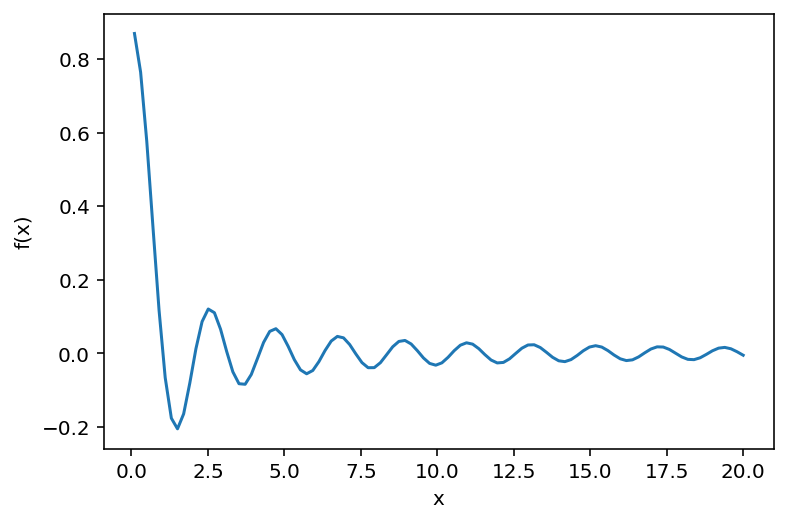

In [9]:
x = linspace(0.1,20,100)
plot(x,f(x))
xlabel('x')
ylabel('f(x)')

### Calculate the solutions of this graph

In [10]:
Ko = [] #List of zeros
ko = ridders(f,0.5,1.5,epsilon) #First solution of the function f(x)
Ko.append(ko)
for j in range(1,150):
    ko = ridders(f,ko + 0.8,ko + 1.3,epsilon)
    Ko.append(ko)
print(Ko)

[1.024421384819211, 2.0809434094841377, 3.1321667904275445, 4.1815106154125115, 5.23001312335456, 6.278116853264961, 7.325974845307055, 8.37367489300997, 9.421267224379749, 10.468782953895632, 11.516242308151586, 12.56365899444962, 13.611042623305934, 14.6584001286108, 15.705736636592277, 16.753056017584182, 17.80036124769141, 18.847654652493013, 19.89493807528932, 20.942212995774735, 21.98948061535848, 23.03674191956667, 24.083997724392482, 25.131248711208748, 26.178495453402572, 27.225738436932755, 28.27297807636718, 29.320214727517737, 30.367448697485536, 31.414680252714895, 32.46190962550147, 33.509137019289824, 34.55636261301502, 35.60358656468358, 36.65080901434476, 37.69803008656983, 38.745249892531795, 39.792468531758786, 40.83968609361916, 41.88690265858507, 42.93411829931221, 43.98133308156589, 45.02854706501877, 46.075760303940086, 47.122972847793626, 48.17018474175786, 49.217396027180065, 50.26460674197392, 51.31181692096853, 52.35902659621582, 53.40623579726185, 54.4534445

### Define the Integration  Method (Simpson's) and 

In [11]:
def simpson(f,a,b,N):
    ### Simpson's Method 
    h = (b - a)/(2*N)
    I = (f(a) + f(b))
    for i in range(1,N):
        I += 2*f(a + 2*i*h)
    for j in range(1, N+1):
        I += 4*f(a+(2*j-1)*h)
    return (h/3)*I

[-8.387248854916956, 0.037654250534556885, 0.6123231081041256, 0.12843343191339368, 0.11042761178556615, -0.022236993441279763, -0.2649479275913901, -0.002862457588799275, 0.12069751460936384, 0.02122520533326364, 0.03350466403933218, -0.007947724427302127, -0.10095928628210418, -0.0017025923288852545, 0.056427198818043894, 0.009220176592032708, 0.017390861551910133, -0.004342886236308841, -0.05639371778365128, -0.0011063885634141138, 0.034154206964270135, 0.005371300471040338, 0.01103680143348784, -0.0028263426951322763, -0.03711192670450942, -0.000786122863218677, 0.02346267062104933, 0.0036046548011444504, 0.007789589238819894, -0.0020247813269898348, -0.02676641628027439, -0.0005939039459485842, 0.017380819528802247, 0.002628580357350713, 0.0058721728668032335, -0.0015415375718142894, -0.020470318346498848, -0.00046855450958461446, 0.0135374133296747, 0.002024286490252178, 0.004629957784383958, -0.0012240059009133736, -0.01630638190026772, -0.0003816651304368663, 0.0109276954803829

### Caculate $J_0(\lambda_{0,n})$ in a list of numerators 

In [ ]:
N = [] # Numerators
for i in range(len(Ko)):
    def g(x):
        d = -(jv(0,Ko[i]*4))/(yv(0,Ko[i]*4))
        R = (jv(0,Ko[i]*x) + d*yv(0,Ko[i]*x))*x
        return R
    n = simpson(g,2,3,1000)
    N.append(n)
print(N)

### Caculate $Y_0(\lambda_{0,n})$ in a list of denominators 

In [12]:
D = [] #Denominators
for i in range(len(Ko)):
    def h(x):
        d = -(jv(0,Ko[i]*4))/(yv(0,Ko[i]*4))
        R2 = ((jv(0,Ko[i]*x) + d*yv(0,Ko[i]*x))**2)*x
        return R2
    d1 = simpson(h,1,4,1000)
    D.append(d1)
print(D)

[46.52105050618173, 0.5101567588989555, 0.5552639300159959, 4.571681365470342, 0.19883644560391034, 0.28938115837363426, 2.3075184841973297, 0.12350061917489745, 0.19585456101406562, 1.5371471045439682, 0.0895649196342005, 0.14804043054842392, 1.1514354495416554, 0.07025914009774953, 0.11899629448100407, 0.9202055004823807, 0.057800350337130275, 0.09948099420301335, 0.7662234093748034, 0.04909464446185174, 0.08546544668239892, 0.6563485942555134, 0.042668138967862264, 0.0749116992494132, 0.5740149269114299, 0.03772937127392251, 0.06667807398771614, 0.510025380908195, 0.033815315291746466, 0.060075223344798236, 0.45886616628137866, 0.030637028365680243, 0.0546622918991733, 0.4170312903469207, 0.02800486765750597, 0.05014419923876011, 0.38218516027994753, 0.02578920755038761, 0.046315985353173, 0.3527119267529858, 0.0238984378850235, 0.04303084567436895, 0.3274581239702745, 0.022265979835174404, 0.040180870510009147, 0.3055783494065815, 0.02084228316927215, 0.03768496382055416, 0.2864388

### Calculate  $A_{0,n}$ in a list

In [13]:
A =[] #Coefficients 
for i in range(len(N)):
    a = N[i]/D[i]
    A.append(a)
print(A)

[-0.18028932630836564, 0.0738091770377091, 1.1027604621940523, 0.02809325971040859, 0.5553690695394048, -0.07684326639044166, -0.11481941722497283, -0.023177678038565606, 0.6162609335439257, 0.013808180928500405, 0.3740824440659507, -0.05368617476900969, -0.08768123851171371, -0.024233036819358827, 0.47419290713335305, 0.01001969297857859, 0.30087813396415425, -0.04365543660979307, -0.07359957565074328, -0.022535830038932586, 0.39962591070508013, 0.00818360931683403, 0.25866610779065813, -0.03772898924268382, -0.06465324326005857, -0.020835832580174036, 0.35187984921957666, 0.007067598860914906, 0.23035684191065792, -0.033704099864410336, -0.05833164056785375, -0.019385168132490242, 0.31796726637188644, 0.006303077054875295, 0.20968400703116166, -0.030742091711831, -0.05356125897589667, -0.018168627658261337, 0.29228382439557193, 0.005739206238040948, 0.19373474562056736, -0.02844484884577681, -0.04979684639538201, -0.01714117830260205, 0.2719626364904369, 0.005301991548109147, 0.18094

### Now we can plot our solution for diferent times

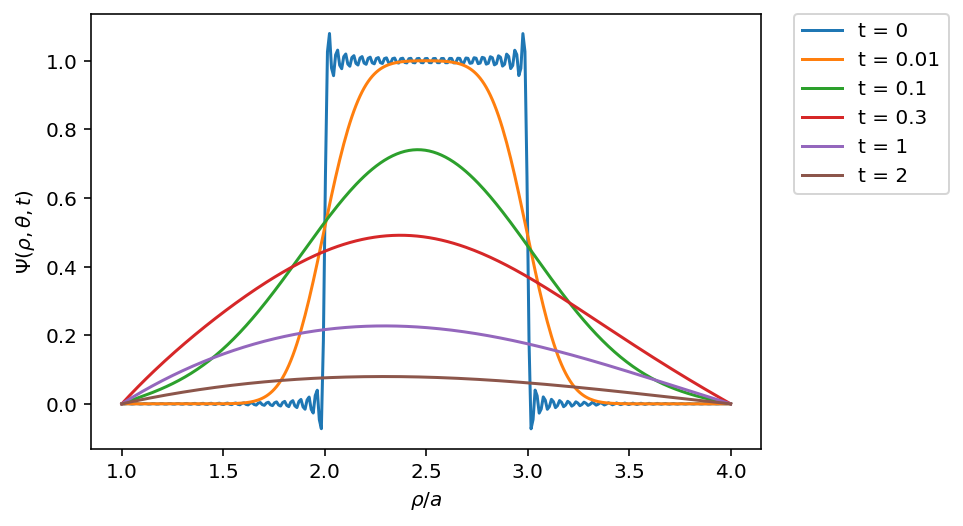

In [14]:
Delta = [] 

def Psi(rho,t):  
    Psi = 0
    for i in range(len(Ko)):
        d = -(jv(0,4*Ko[i]))/(yv(0,4*Ko[i]))
        Delta.append(d)
        Psi += A[i]*(jv(0,Ko[i]*rho) + d*yv(0,Ko[i]*rho))*e**(-((Ko[i])**2)*t)
    return Psi
        
rho = linspace(1,4,300)
plot(rho,Psi(rho,0),label='t = 0')
plot(rho,Psi(rho,0.01), label='t = 0.01')
plot(rho,Psi(rho,0.1), label= 't = 0.1')
plot(rho,Psi(rho,0.3), label='t = 0.3')
plot(rho,Psi(rho,1), label='t = 1')
plot(rho,Psi(rho,2),label='t = 2')
xlabel(r'$\rho/a$')
ylabel(r'$\Psi(\rho,\theta,t)$')
legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
show()



### Build a DataFrame with the results

In [15]:
D = np.zeros([151,3])
for i in range(len(Ko)):
    D[i,0] = Ko[i]
    D[i,1] = Delta[i]
    D[i,2] = A[i]
    
df =pd.DataFrame(D,columns=[r'$\lambda_n$',r'$A_{0,n}$', r'$\delta_n$'])


df.style.format(dict(zip(df.columns, ["{:2.1f}"] )))

,$\lambda_n$,"$A_{0,n}$",$\delta_n$
0,1.0,-7.044907,-0.180289
1,2.1,-0.343101,0.073809
2,3.1,0.908972,1.102760
3,4.2,-4.364746,0.028093
4,5.2,-0.300228,0.555369
5,6.3,0.950739,-0.076843
6,7.3,-4.088053,-0.114819
7,8.4,-0.288802,-0.023178
8,9.4,0.965872,0.616261
9,10.5,-3.981950,0.013808


### Now we can make a GIF of the temporal evolution of the system 

In [16]:
Nr,Nt = 200,200
rho,t = linspace(1,4,Nr),linspace(0,2,Nt)
u = np.zeros((Nr,Nt))
for i in range(Nt):
    u[:,i] = Psi(rho,t[i])  

In [17]:
%%capture
fig = figure(dpi=150)
ax = axes(xlim=(1,4),ylim=(0,1.2))
line, = plot([],[],lw=1,color="green")

def init():
    line.set_data([],[])
    return line,

def animar(i):
    line.set_data(rho,u[:,i])
    return line,

#Animation of the aproximation to thermal equilibrium with time

pelicula = animation.FuncAnimation(fig,animar,init_func=init,frames=len(t),interval=40,blit=True)

In [18]:
HTML(pelicula.to_html5_video())

### We can also visualize this solution as a function of $\Psi(x,y, t=0)$ 

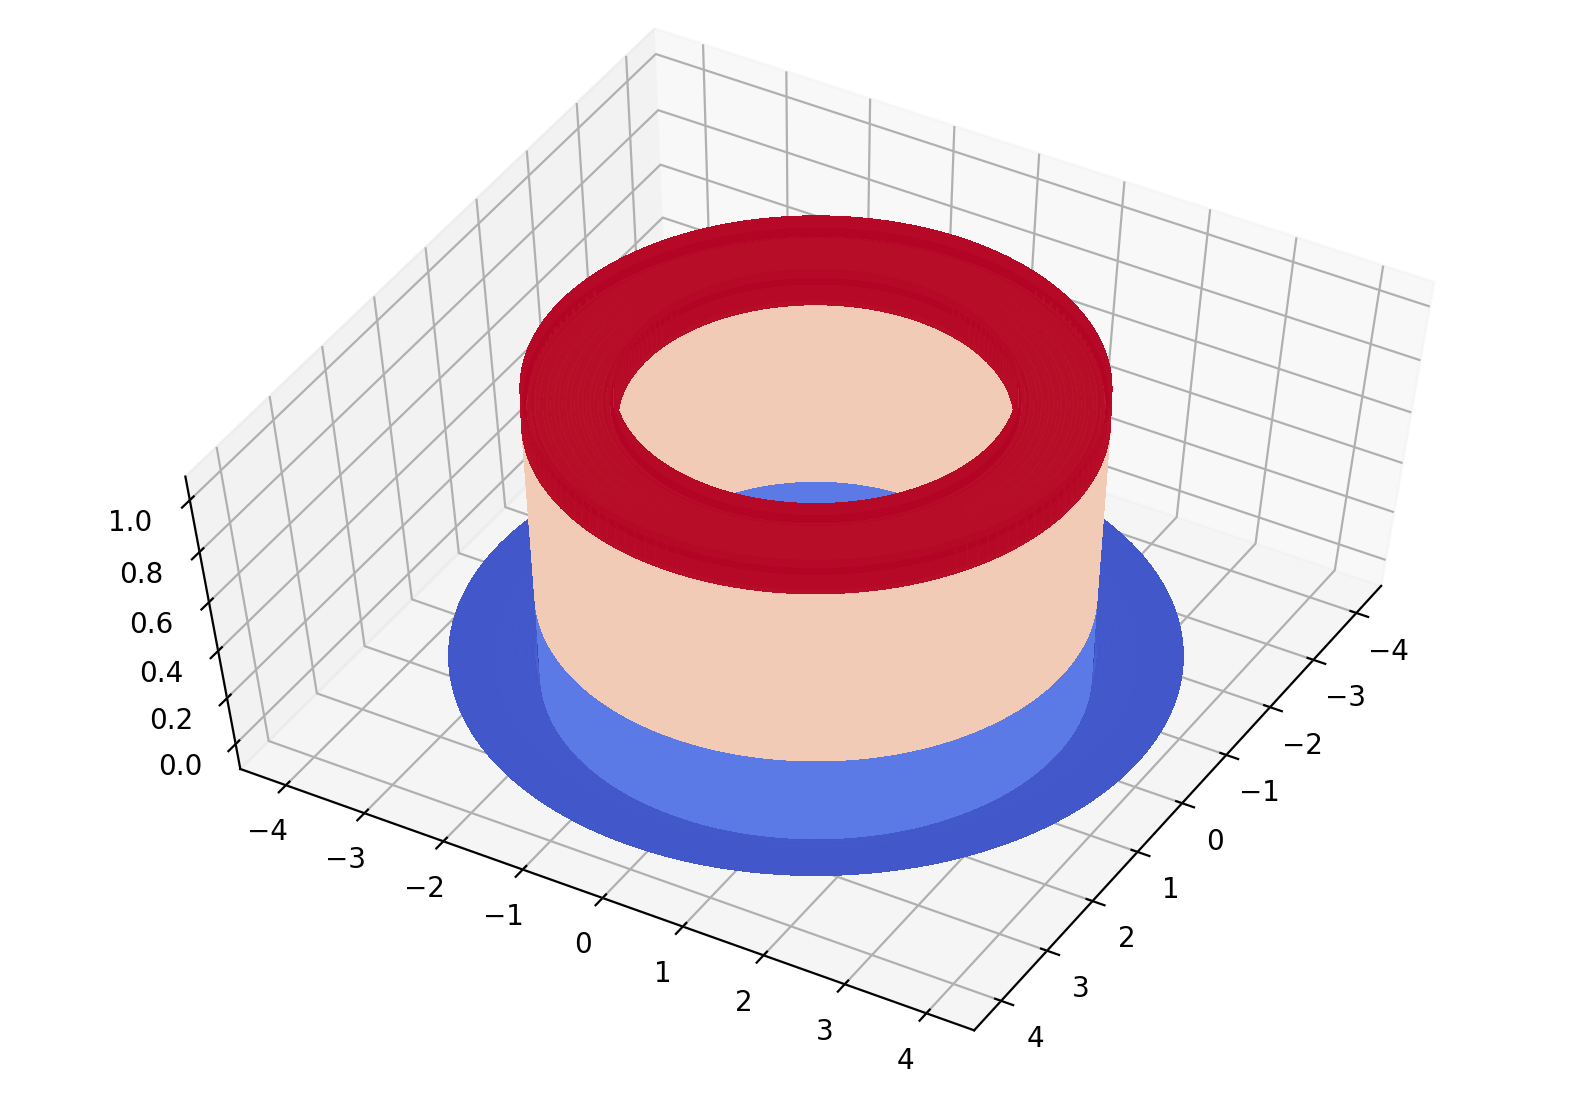

In [19]:
theta = linspace(0,2*pi,150)
RHO,THETA = meshgrid(rho,theta)
X,Y = RHO*cos(THETA),RHO*sin(THETA)
psi_ti = [0 for i in range(Nt)]
for i in range(Nt):
    psi_mesh,psi_mesh_th = meshgrid(u[:,i],theta)
    psi_ti[i] = psi_mesh
fig = figure(figsize=(10,7),dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,psi_ti[0],rstride=1,cstride=1,cmap=plt.cm.coolwarm,linewidth=0,antialiased=False)
ax.view_init(60,30)

### Or we can see the solution as a fuction $\Psi(x,y,t)$ in a GIF

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [21]:
%%capture


fig = plt.figure(figsize=(10,5),dpi=100)
ax = p3.Axes3D(fig)
ax.set_xlim3d([-4.1, 4.1])
ax.set_xlabel('X')

ax.set_ylim3d([-4.1, 4.1])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.2])
ax.set_zlabel('Z')

ax.set_title('3D Test')

ax.plot_surface(X,Y,psi_ti[0],rstride=1,cstride=1,cmap=plt.cm.coolwarm,linewidth=0,vmin=0,vmax=1,antialiased=False)
ax.view_init(60,30)

def animar(i,ax,fig):
    ax.cla()
    ax.set_xlim3d((-4.1,4.1)),ax.set_ylim3d((-4.1,4.1)),ax.set_zlim3d((0,1.1))
    grafica = (ax.plot_surface(X,Y,psi_ti[i],rstride=1,cstride=1,cmap=plt.cm.coolwarm,linewidth=0,vmin=0,vmax=1,antialiased=False))
    ax.view_init(60,30+i)
    return grafica




pelicula = animation.FuncAnimation(fig,animar,frames=Nt,fargs=(ax,fig),interval=20)

In [22]:
HTML(pelicula.to_html5_video())